In [32]:
import numpy as np
import matplotlib as mp 
import pandas as pd
import matplotlib.pyplot as plt
from ipywidgets import interact

In [33]:
df = pd.read_excel (r'D:\Universitas Indonesia\Semester 6\Pemodelan dan Pembelajaran Mesin\QCM12.xlsx')
print(df.shape)
data = df.iloc[:, 0:10]
label = df.iloc[:, 10:]
data = data.to_numpy()
label = label.to_numpy()
# np.transpose(data)
print(data.shape)
print(data[0].shape)

(25, 15)
(25, 10)
(10,)


In [34]:
def normalize(X):
    mu = np.mean(X, axis=0)
    std = np.std(X, axis=0)
    std_filled = std.copy()
    std_filled[std==0] = 1.
    Xbar = ((X-mu)/std_filled)
    return Xbar, mu, std

def eig(S):
    eigvals, eigvecs = np.linalg.eig(S)
    k = np.argsort(eigvals)[::-1]
    return eigvals[k], eigvecs[:,k]

def projection_matrix(B):
    return (B @ np.linalg.inv(B.T @ B) @ B.T)

def PCA(X, num_components):
    S = 1.0/len(X) * np.dot(X.T, X)
    eig_vals, eig_vecs = eig(S)
    eig_vals, eig_vecs = eig_vals[:num_components], eig_vecs[:, :num_components]
    B = np.real(eig_vecs)
    reconst = (projection_matrix(B) @ X.T)
    return reconst.T

In [35]:
## Data Preprocessing
NUM_DATAPOINTS = 1000
X = (data.reshape(-1, 25)[:NUM_DATAPOINTS]) / 255.
Xbar, mu, std = normalize(X)

In [36]:
## PCA Implementation
for num_component in range(1, 11):
    from sklearn.decomposition import PCA as SKPCA
    pca = SKPCA(n_components=num_component, svd_solver='full')
    sklearn_reconst = pca.inverse_transform(pca.fit_transform(Xbar))
    reconst = PCA(Xbar, num_component)
    np.testing.assert_almost_equal(reconst, sklearn_reconst)
    dpp = np.square(reconst - sklearn_reconst).sum()
    print(np.square(reconst - sklearn_reconst).sum())

7.529864275909785e-29
1.5309766017968288e-28
1.4692168433051911e-28
1.8797894777445787e-28
3.6189793287940837e-28
7.49868383122202e-28
9.267575975726973e-28
4.1372385064404364e-27
3.798155573016477e-27
3.65559732371621e-27


In [37]:
def mse(predict, actual):
    """Helper function for computing the mean squared error (MSE)"""
    return np.square(predict - actual).sum(axis=1).mean()

In [42]:
loss = []
reconstructions = []
for num_component in range(1, 11):
    reconst = PCA(Xbar, num_component)
    error = mse(reconst, Xbar)
    reconstructions.append(reconst)
    loss.append((num_component, error))

reconstructions = np.asarray(reconstructions)
reconstructions = reconstructions * std + mu 
loss = np.asarray(loss)

In [43]:
print(loss)

[[1.00000000e+00 1.03397804e+01]
 [2.00000000e+00 5.04307183e-01]
 [3.00000000e+00 1.19233624e-01]
 [4.00000000e+00 5.48452606e-02]
 [5.00000000e+00 1.41121619e-02]
 [6.00000000e+00 8.13806532e-03]
 [7.00000000e+00 3.75246350e-03]
 [8.00000000e+00 1.59427289e-03]
 [9.00000000e+00 3.75403384e-28]
 [1.00000000e+01 3.61858478e-28]]


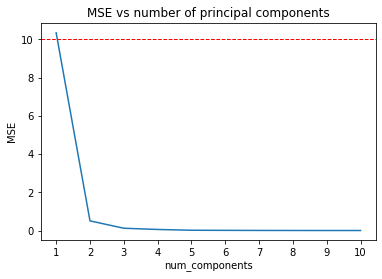

In [44]:
fig, ax = plt.subplots()
ax.plot(loss[:,0], loss[:,1]);
ax.axhline(10, linestyle='--', color='r', linewidth=1)
ax.xaxis.set_ticks(np.arange(1, 11, 1))
ax.set(xlabel='num_components', ylabel='MSE', title='MSE vs number of principal components');